# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus
0. Inspect data
0. Clean and Process Text
0. Vectorize your text
0. Classify your text using Multinomial Naive Bayes
0. Classify your text using Random Forest. 
0. Eval your models.  
0. Classify a NEW PIECE of text. Any string you want to feed it. 


## PART 2:
- Republican vs Democrat Tweet Classifier
0.  This is self guided, can you get a f1 above 82%?  -its not easy.

In [72]:
## IMPORT YOUR LIBS HERE
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Libraries for helping us with text
import string
# Regular Expression Library
import re

import nltk 
# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dariakhotunitskaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dariakhotunitskaya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dariakhotunitskaya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [21]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)

(11314, 4)


In [22]:
df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [23]:
# 3. Inspect / remove nulls and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())


id                0
message           0
topic             0
topic_category    0
dtype: int64
0


In [18]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [24]:
# 4. Find class balances, print out how many of each topic_category there are.
df['topic_category'].value_counts()

topic_category
rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: count, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
0. EXTRA CREDIT:  
    0. Make a function that stemms all words. 
    0. Make a function that removes all stopwords.

5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [74]:
# 1. Make a function that makes all text lowercase.
test_string = 'This is A SENTENCE with LOTS OF CAPS.'
def lowercase(string):
    return string.lower()
lowercase(test_string)


'this is a sentence with lots of caps.'

In [34]:
# 2. Make a function that removes all punctuation. 
test_string= 'This is a sentence! 50 With lots of punctuation??? & other #things.'
def remove_punctuation(string):
    new_string = re.sub(r'[^\w\s]','',string)
    return new_string
remove_punctuation(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [35]:
# 3. Make a function that removes all stopwords.
test_string = 'This is a sentence! With some different stopwords i have added in here.'
def remove_stopwords(string):
    new_string = ' '.join([word for word in string.split() if word not in stopwords])
    return new_string
remove_stopwords(test_string)

'This sentence! With different stopwords added here.'

In [77]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 
test_string = 'I played and started playing with players and we all love to play with plays'
def stemming(string):
    ps = PorterStemmer()
    for s in string.split():
        ps.stem(s)
    return string
stemming(test_string)   

'I played and started playing with players and we all love to play with plays'

In [78]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
test_string = 'I played and started playing with players and we all love to play with plays'
def text_pipeline(input_string):
    input_string = lowercase(input_string)
    input_string = remove_punctuation(input_string)
    input_string = stemming(input_string)   
    return input_string
text_pipeline(test_string)  

'i played and started playing with players and we all love to play with plays'

In [80]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message']=df['message'].apply(text_pipeline)

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [82]:
# 0. Define your `X` and `y` data. 
X=df['message']
y=df['topic_category']


In [83]:
# 1. Train test split your data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [84]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
vectorizer = TfidfVectorizer()

In [85]:
# 3. Fit your vectorizer using your X data
vectorizer.fit(X_train)

TfidfVectorizer()

In [86]:
# 4. Transform your X data using your fitted vectorizer. 
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)



In [87]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X_train.shape)


(7580, 114576)


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [88]:
# 1. Initalize an empty model. 
model = MultinomialNB()

In [89]:
# Fit our model with our training data.
model.fit(X_train, y_train)

MultinomialNB()

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [90]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)

In [91]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.841457


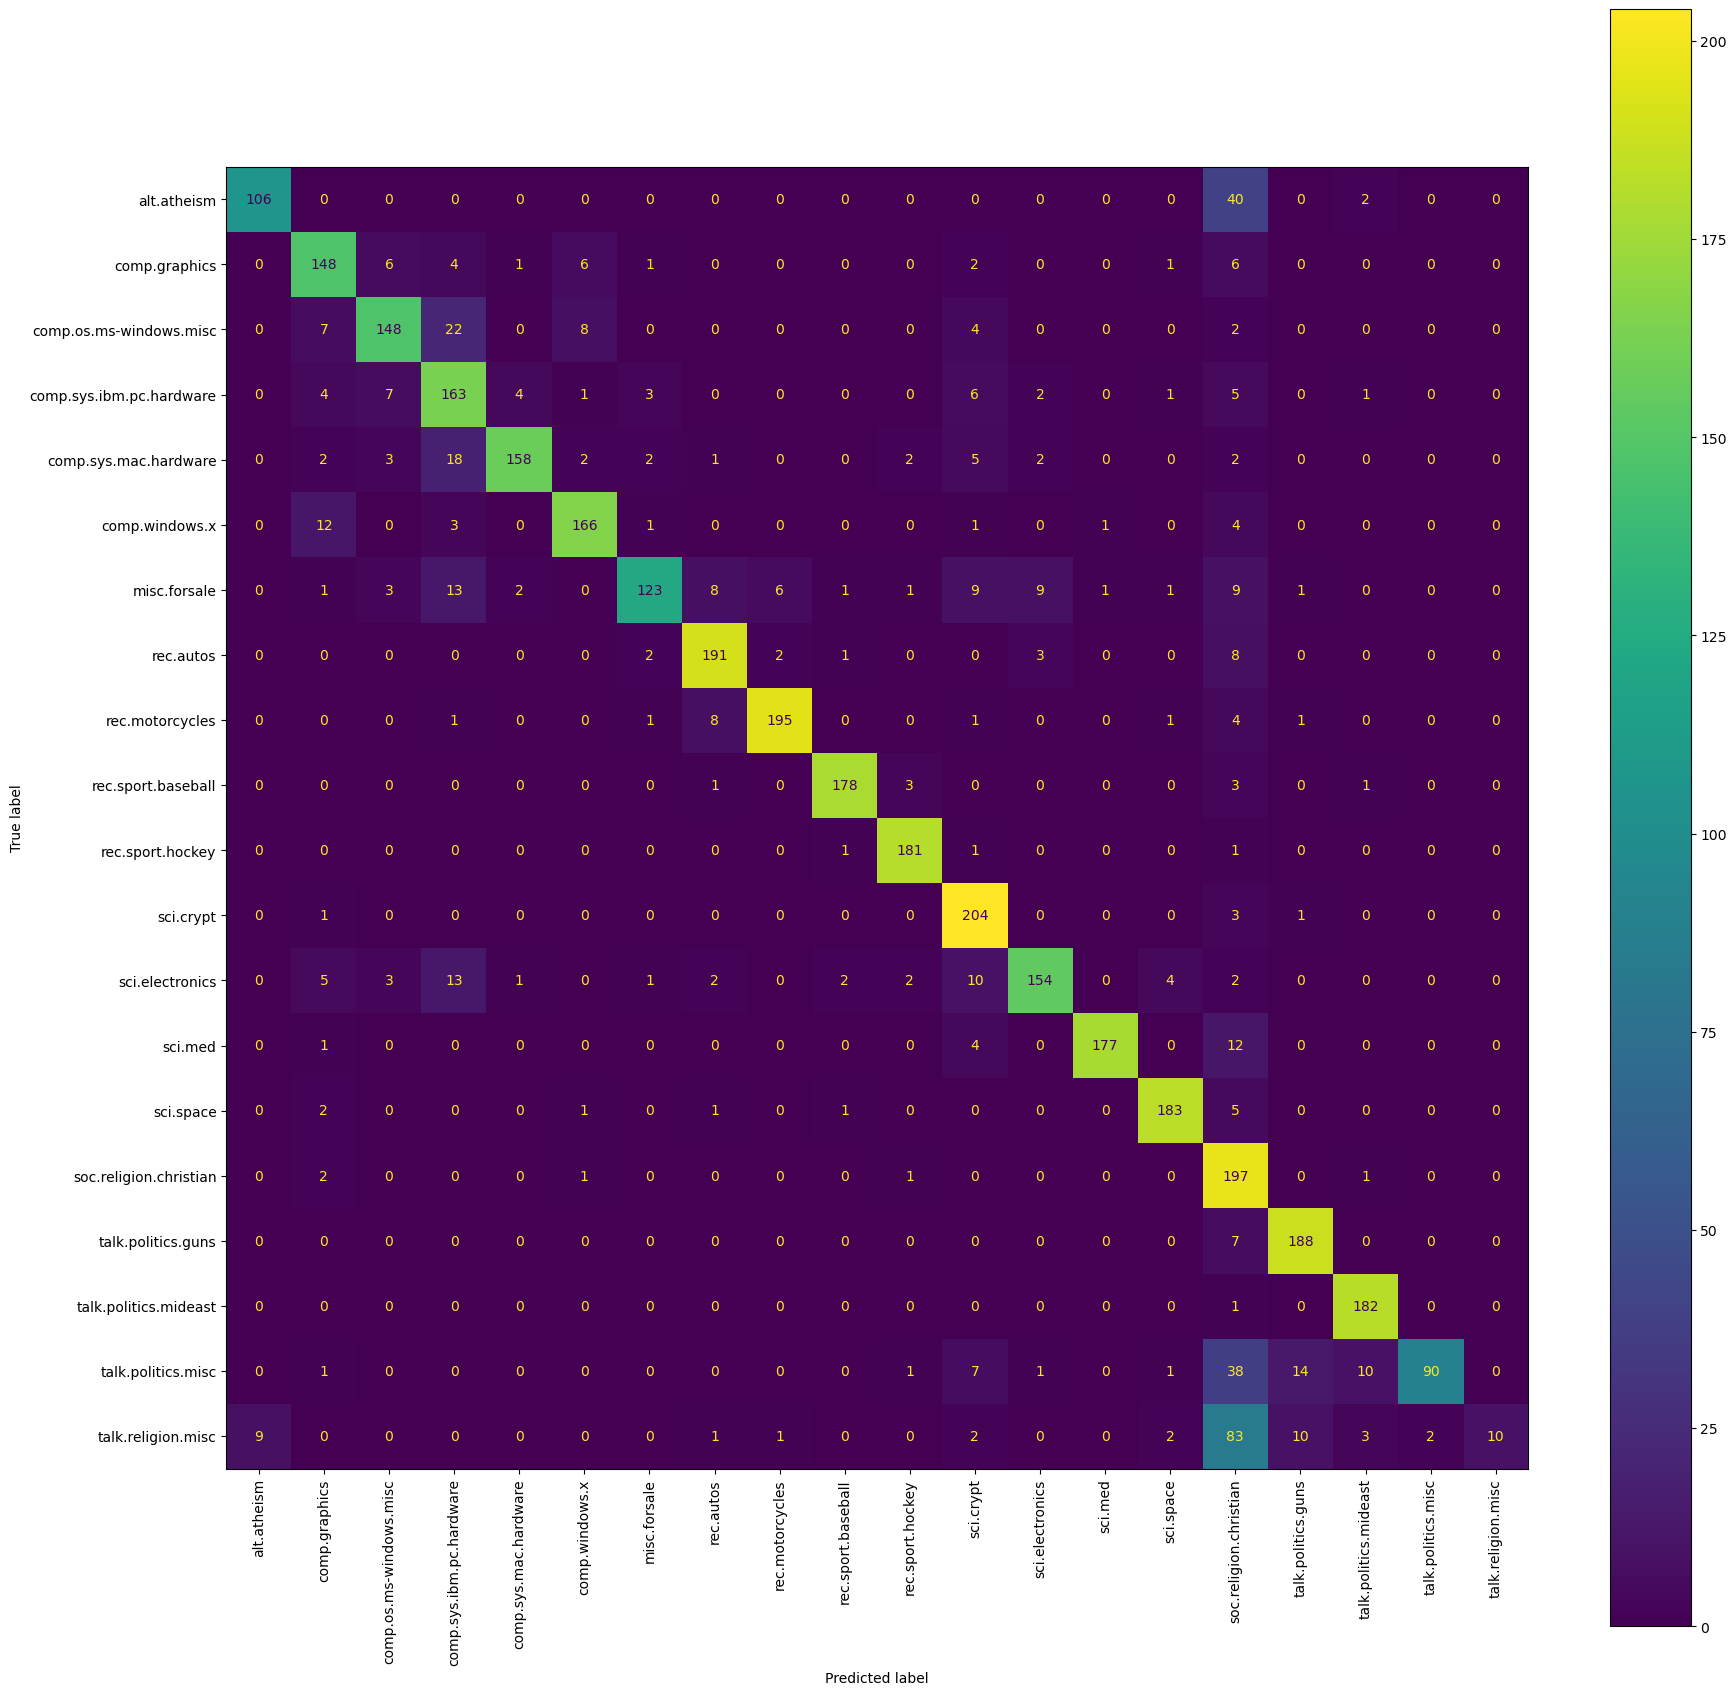

In [92]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
fig, ax = plt.subplots(figsize=(21, 21))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,ax=ax);
plt.xticks(rotation=90);

In [93]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
print(classification_report(y_test, y_pred, target_names=model.classes_))


                          precision    recall  f1-score   support

             alt.atheism       0.92      0.72      0.81       148
           comp.graphics       0.80      0.85      0.82       175
 comp.os.ms-windows.misc       0.87      0.77      0.82       191
comp.sys.ibm.pc.hardware       0.69      0.83      0.75       197
   comp.sys.mac.hardware       0.95      0.80      0.87       197
          comp.windows.x       0.90      0.88      0.89       188
            misc.forsale       0.92      0.65      0.76       188
               rec.autos       0.90      0.92      0.91       207
         rec.motorcycles       0.96      0.92      0.94       212
      rec.sport.baseball       0.97      0.96      0.96       186
        rec.sport.hockey       0.95      0.98      0.97       184
               sci.crypt       0.80      0.98      0.88       209
         sci.electronics       0.90      0.77      0.83       199
                 sci.med       0.99      0.91      0.95       194
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [94]:
my_sentence = 'The Second Amendment guarantees the right of every law-abiding American to bear arms, ensuring the protection of individual liberties and the ability to defend against potential threats.'

# 1. Apply the text pipeline to your sentence
my_sentence = text_pipeline(my_sentence)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([my_sentence])
# 3. Use the model to predict your new `X`. 
model.predict(X)
# 4. Print the prediction
print(model.predict(X))

['talk.politics.guns']


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [103]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df1 = pd.read_csv('data/dem-vs-rep-tweets.csv')
df1.shape

(86460, 3)

In [104]:
#getting first 5 values
df1.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [105]:
#checking null and duplicates
df1.duplicated().sum()

57

In [106]:
df1.drop_duplicates(inplace=True)

In [107]:
df1.isna().sum()

Party     0
Handle    0
Tweet     0
dtype: int64

In [112]:
df['Tweet']=df['Tweet'].apply(text_pipeline)
X = df1['Tweet']
y_tweets = df1['Party']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
vectorizer_tweets = TfidfVectorizer()
vectorizer_tweets.fit(X_train)
X_train = vectorizer_tweets.transform(X_train)
X_test = vectorizer_tweets.transform(X_test)

model = MultinomialNB(alpha=0.05)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Democrat       0.81      0.79      0.80     13872
  Republican       0.80      0.83      0.82     14641

    accuracy                           0.81     28513
   macro avg       0.81      0.81      0.81     28513
weighted avg       0.81      0.81      0.81     28513

